In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('diabetes.csv',header=None,names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
clf = DecisionTreeClassifier()

In [6]:
clf = clf.fit(X_train,y_train)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print(f"Dokładność: {metrics.accuracy_score(y_test,y_pred)}")

Dokładność: 0.696969696969697


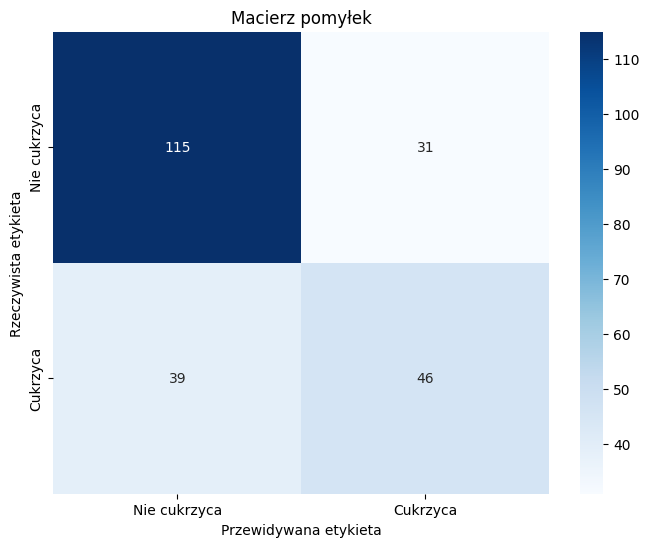

In [9]:
# prompt: przeprowadź wizualizację wyników predykcji

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Wygeneruj macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Nie cukrzyca', 'Cukrzyca'],
            yticklabels=['Nie cukrzyca', 'Cukrzyca'])
plt.xlabel('Przewidywana etykieta')
plt.ylabel('Rzeczywista etykieta')
plt.title('Macierz pomyłek')
plt.show()

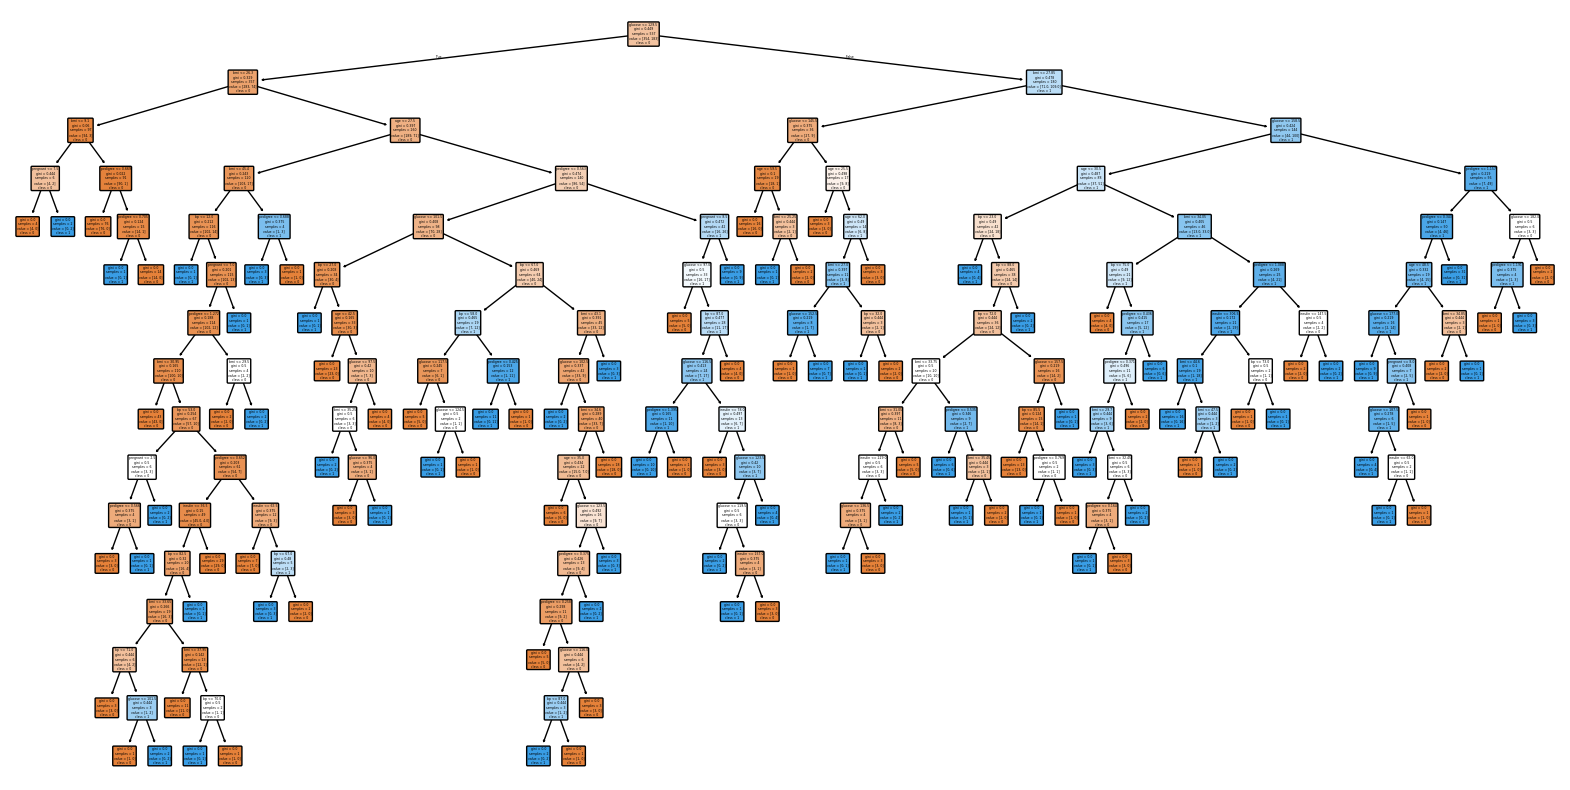

In [11]:
# prompt: czy możesz narysowac drzewo decyzyjne?

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True)
plt.show()